# ER graphs

1-Generate 10 replicas of ER graphs with N=1000 nodes and connection probabilities p=[0.00005, 0.0001, 0.0002, 0.001, 0.002,0.005, 0.01,0.015, 0.02]

2- show visually and with a linear fit that $\langle k\rangle=Np$

3- Are the networks connected? Which is the size of the giant component?  Plot size of the giant component as a function of p. What do you observe?

In [13]:
import networkx as nx
import random

import matplotlib.pyplot as plt

import itertools

import numpy as np
import math

## Question 1 - Génération des graphes

In [39]:
import random
random.seed(2021)
np.random.seed(2021)

In [40]:
N=1000
nRepl=10
pList=[0.00005, 0.0001, 0.0002, 0.001, 0.002,0.005, 0.01,0.015, 0.02]

In [41]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter p
listGraphs={}

#loop on the values for the parameter p
for p in pList:
    print (p) #to be sure that I'm not too slow
    listGraphs[p]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[p].append(G)

5e-05
0.0001
0.0002
0.001
0.002
0.005
0.01
0.015
0.02


## Question 2 - show visually and with a linear fit that $\langle k\rangle=Np$

On a vu dans le cours, que la relation entre le degré moyen $\langle k\rangle$ et $p$ était bien linéaire mais plutôt sous la forme $\langle k\rangle=(N-1)p$

In [42]:
avK=[np.mean([np.mean([G.degree(u) for u in G.nodes()]) for G in listGraphs[p]]) for p in pList]

On fait d'abord une régression linéaire avec constante

In [43]:
coef = np.polyfit(pList,avK, 1)
poly1d_fn = np.poly1d(coef)
lin_fit = "<k> = {} p + {}".format(round(coef[0],2),
                             round(coef[1],2))
lin_fit

'<k> = 995.88 p + 0.02'

Il serait peut-être plus pertinent de faire une régression linéaire sans constante : pour $p=0$ le degré moyen est nul. La valeur de la constante était presque nulle, cela ne change quasiment pas les résultats d'enlever la constante.

In [18]:
from scipy.optimize import curve_fit
def f(x, a):
    return a * x

# parameters and parameter covariances
popt, pcov = curve_fit(f, pList, avK)
popt
lin_fit_without_c = "<k> = {} p".format(round(popt[0],2))
poly1d_fn = np.poly1d([popt[0],0]) 
lin_fit_without_c

'<k> = 998.1 p'

On ne retrouve pas exactement la relation $<k>=(N-1)p$ mais quelque chose d'assez proche par la régression linéaire sans constante, cela vient sûrement du fait que l'on fait une régression linéaire avec 7 observations, et donc qu'il y a beaucoup de variance dans les estimations. Par ailleurs, du fait de l'aléatoire, en relançant les programmes on trouve des résultats différents

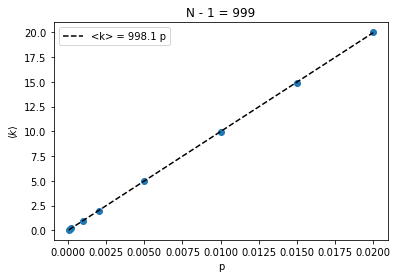

In [19]:
plt.plot(pList,avK,'o')
plt.plot(pList, poly1d_fn(pList), '--k',label = lin_fit_without_c)

plt.xlabel('p')
plt.ylabel(r'$\langle k\rangle$')
plt.legend()
plt.title("N - 1 = {}".format(N-1))
plt.show()

## Question 3 - Are the networks connected? Which is the size of the giant component?  Plot size of the giant component as a function of p. What do you observe?  
Pour chaque valeur de $p$ on regarde la taille moyenne de la composante maximale.   
https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph

On regardant la connectivité on note que pour des petites probabilités ($p<0.01$) les graphs ne sont pas connectés mais ils le sont dès lors que $p\geq 0.01$. Dès lors que les graphs sont connectés, on va trouver que la taille de la *giant component* est de 1000 (il n'y a qu'une seule composante).

In [44]:
{k:[nx.is_connected(g) for g in listGraphs[k]] for k in listGraphs.keys()}

{5e-05: [False, False, False, False, False, False, False, False, False, False],
 0.0001: [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 0.0002: [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 0.001: [False, False, False, False, False, False, False, False, False, False],
 0.002: [False, False, False, False, False, False, False, False, False, False],
 0.005: [False, False, False, False, False, False, False, False, False, False],
 0.01: [True, True, True, True, True, True, True, True, True, True],
 0.015: [True, True, True, True, True, True, True, True, True, True],
 0.02: [True, True, True, True, True, True, True, True, True, True]}

In [51]:
def giant_comp(G):
    return G.subgraph(max(nx.connected_components(G), key=len))

In [57]:
avG=[np.mean([len(giant_comp(G)) for G in listGraphs[p]]) for p in pList]

In [99]:
print(pList,"\n",avG)

[5e-05, 0.0001, 0.0002, 0.001, 0.002, 0.005, 0.01, 0.015, 0.02] 
 [2.8, 3.5, 4.4, 107.5, 803.9, 992.7, 1000.0, 1000.0, 1000.0]


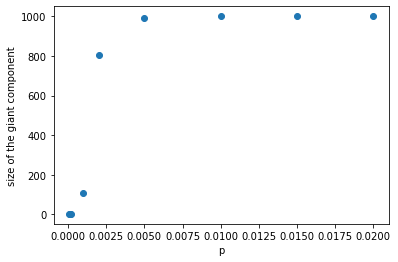

In [100]:
plt.plot(pList,avG,'o')
plt.xlabel('p')
plt.ylabel("size of the giant component")
plt.show()

On observe en fait 3 phases différentes, qu'on retrouve dans la littérature :
- $p<\frac{1}{N}=0.001$, évolution très lente, logarithmique

- $\frac{1}{N}=0.001\leq p< \frac{\log(N)}{N}\simeq 0.007$ augmentation très rapide

- $p> \frac{\log(N)}{N}\simeq 0.007$ taille égale à $N$

# COMPARISON WITH REAL NETWORKS

1- Take the twitch networks from last lesson. Calculate their average clustering coefficient. Calculate the average clustering coefficient for several replicas of a random graph with the same number of nodes and the same number of edges (using p=2E/N(N-1) ) of the twich networks. Compare the real values and the random values. What do you observe? How can you interpret this?

OPTIONAL: perform a significance test to see if the value observed in real networks is equal to the value observed in the random case. 

2- OPTIONAL: A better way to randomize network structures consists in rewiring the links preserving the degree structure:

(1) take two links (n1,n2) and (n3,n4). 

(2)exchange one of the extremes in order to have (n1,n4) and (n3,n2)

(3) Iterate this procedure for a number of times proportional to the number of edges

Write the script performing this procedure and apply this to one of the Twitch networks. 